In [2]:
!pip install matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,5)

In [4]:
data=pd.read_csv(r'C:\Users\AMAR PAAPU\Desktop\Project\Stroke Prediction\dataset\healthcare-dataset-stroke-data.csv')

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
data.shape

(5110, 12)

## exploratory data analysis


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#to find null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

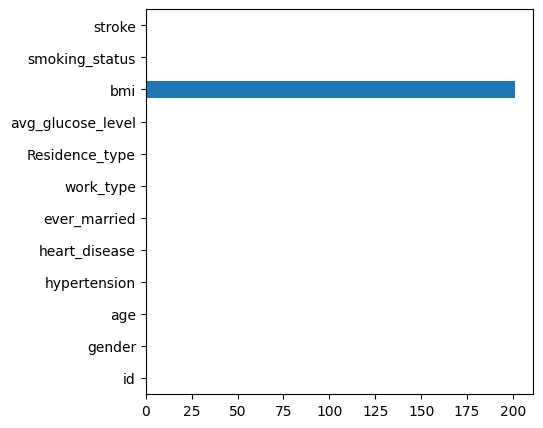

In [9]:
print(data.isna().sum())
data.isna().sum().plot.barh()

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
# It helps in filling all the null values
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [12]:
# It describes all the datas
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
# Again isnull is performed to check
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# to remove the col ID
df = data.drop('id', axis=1, inplace=True)

In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [16]:
# histogram

<Axes: xlabel='bmi', ylabel='Count'>

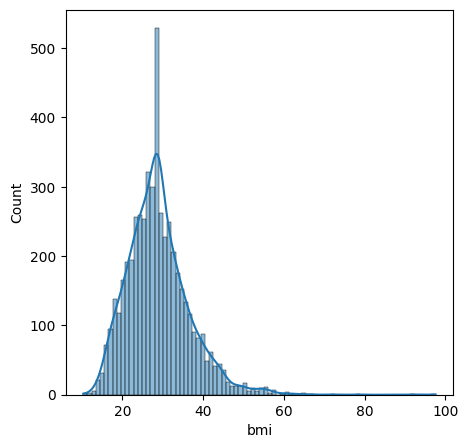

In [17]:
sns.histplot(data['bmi'],kde = True)


# Outlier removal

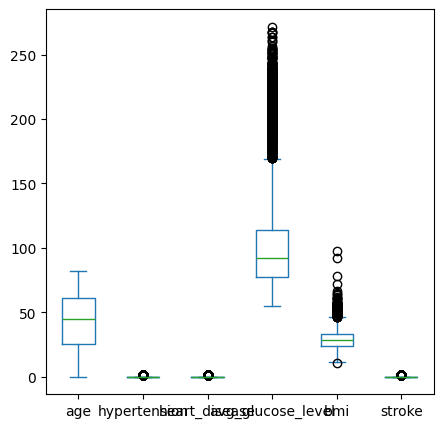

In [18]:
data.plot(kind='box')
plt.show()

In [19]:
# here the outlier is more in avg glucose
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [20]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [21]:
# there are 1277 rows having these result......but we cannot remove them as they predicts the stroke rate

# Label Encoding

In [22]:
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
# Gender analysis

In [24]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

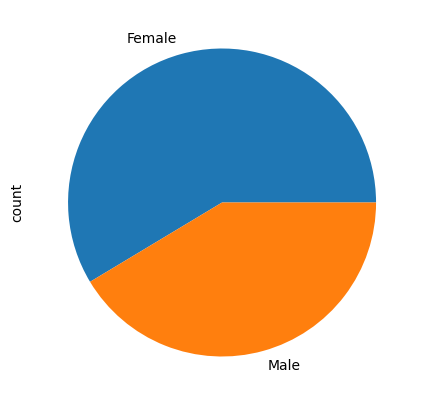

In [25]:
data['gender'] = data['gender'].replace('Other','Female')
data['gender'].value_counts().plot(kind="pie")

<Axes: xlabel='gender'>

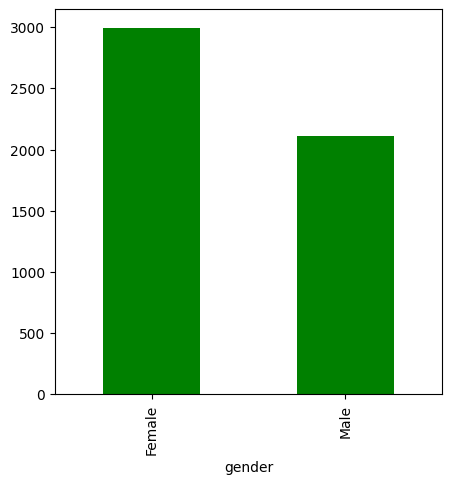

In [26]:
data['gender'].value_counts().plot(kind="bar",color = "green")

In [27]:
# stroke analysis

<Axes: xlabel='stroke', ylabel='Count'>

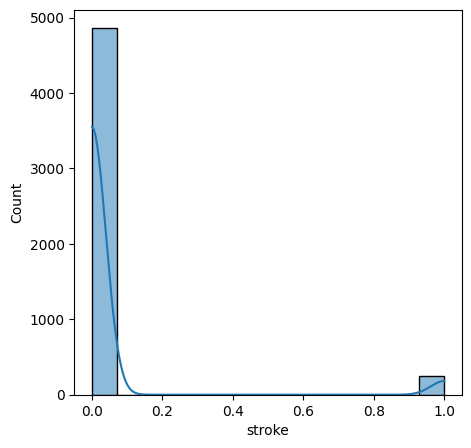

In [28]:
data['stroke'].value_counts()
sns.histplot(data['stroke'],kde = True)

<Axes: xlabel='stroke'>

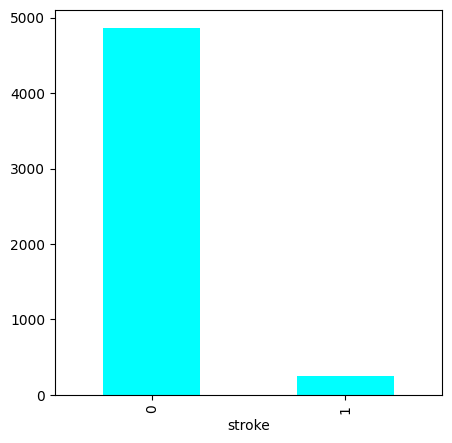

In [29]:
data['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [30]:
print("% of people who actualy got a stroke : ",(data['stroke'].value_counts()[1]/data['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


In [31]:
# Hypertension analysis

In [32]:
data['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: ylabel='count'>

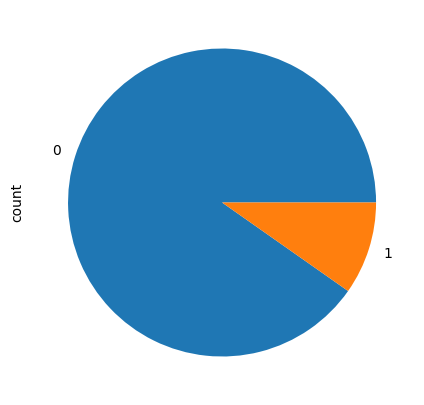

In [33]:
data['hypertension'].value_counts().plot(kind="pie")

<Axes: xlabel='hypertension'>

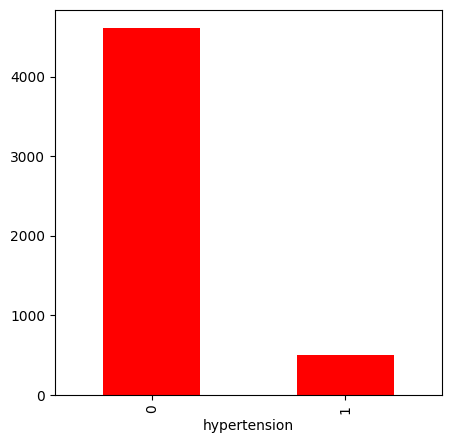

In [34]:
data['hypertension'].value_counts().plot(kind="bar",color = "red")

In [35]:
# work type analysis

In [36]:
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

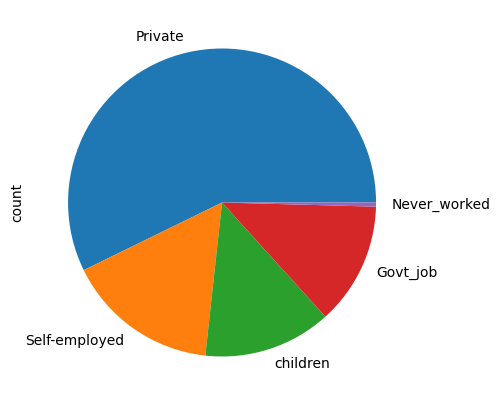

In [37]:
data['work_type'].value_counts().plot(kind="pie")

<Axes: xlabel='work_type'>

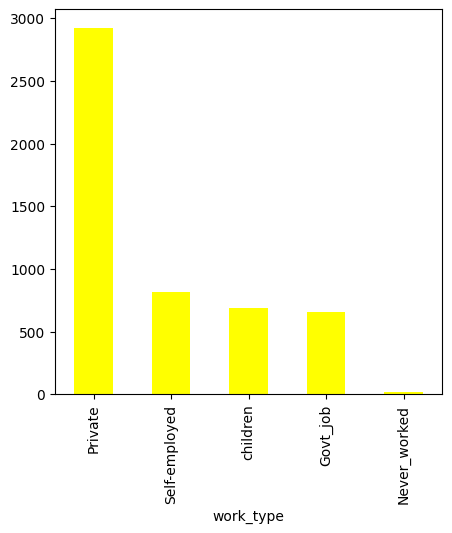

In [38]:
data['work_type'].value_counts().plot(kind="bar",color = "yellow")

In [39]:
# smoking status analysis

In [40]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

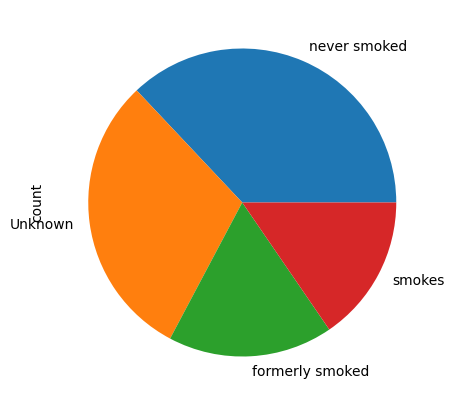

In [41]:
data['smoking_status'].value_counts().plot(kind="pie")

<Axes: xlabel='smoking_status'>

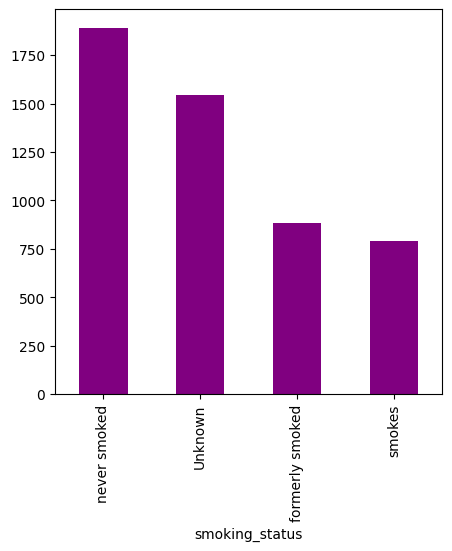

In [42]:
data['smoking_status'].value_counts().plot(kind="bar",color = "purple")

In [43]:
# Residence analysis

In [44]:
data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

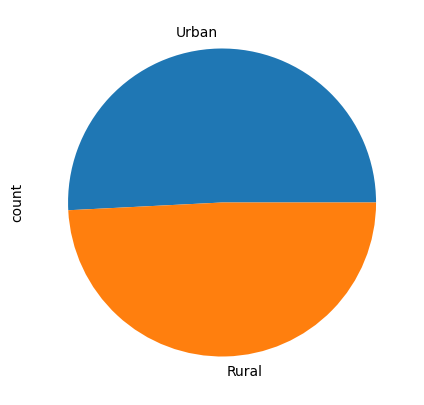

In [45]:
data['Residence_type'].value_counts().plot(kind="pie")

<Axes: xlabel='Residence_type'>

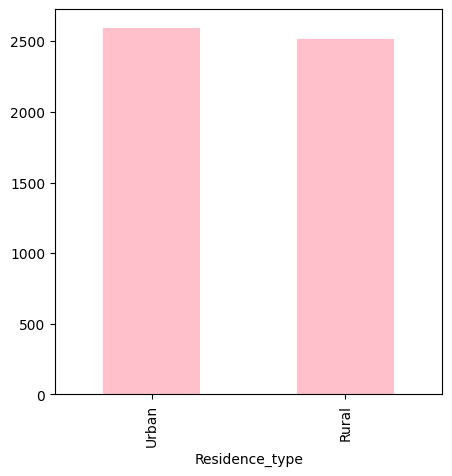

In [46]:
data['Residence_type'].value_counts().plot(kind="bar",color = "pink")

In [47]:
# cross analysis

<Axes: xlabel='gender'>

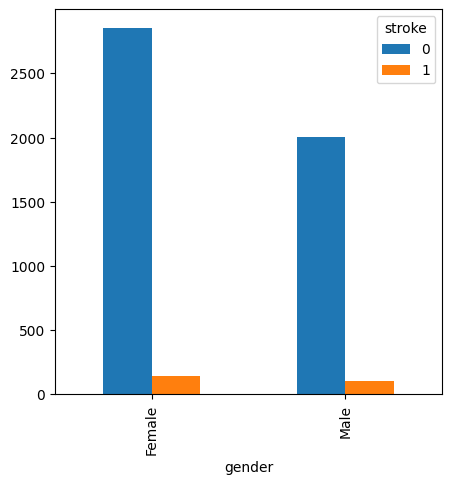

In [48]:
pd.crosstab(data['gender'],data['stroke']).plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

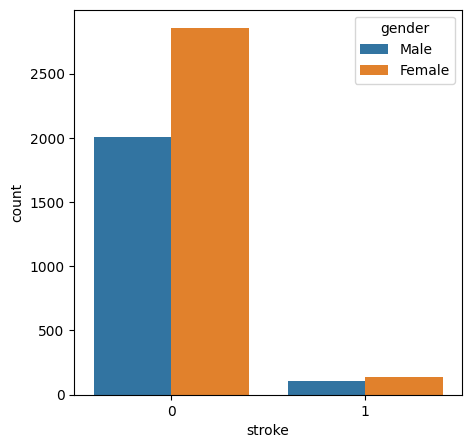

In [49]:
sns.countplot(x='stroke', hue='gender', data=data)

<Axes: xlabel='hypertension'>

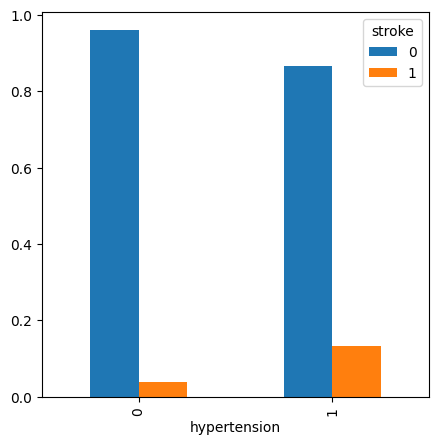

In [50]:
pd.crosstab(data['hypertension'],data['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

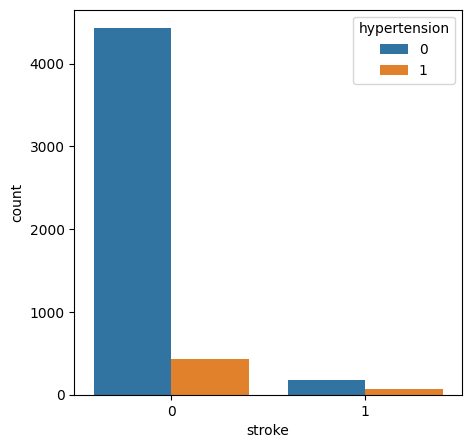

In [51]:
sns.countplot(x='stroke', hue='hypertension', data=data)

<Axes: xlabel='work_type'>

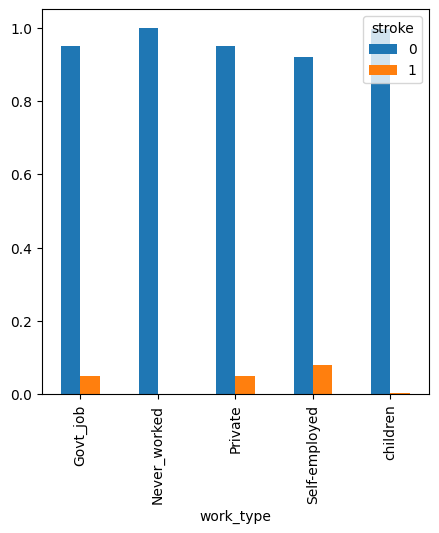

In [52]:
pd.crosstab(data['work_type'],data['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

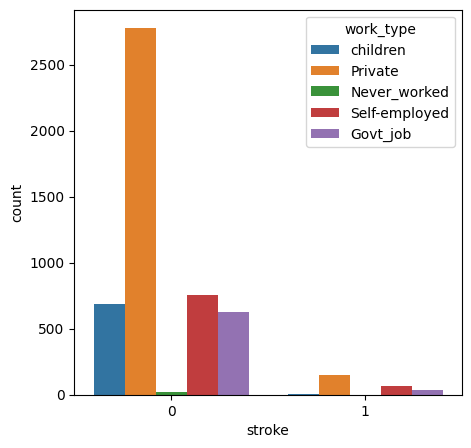

In [53]:
sns.countplot(x='stroke', hue='work_type', data=data)

<Axes: xlabel='smoking_status'>

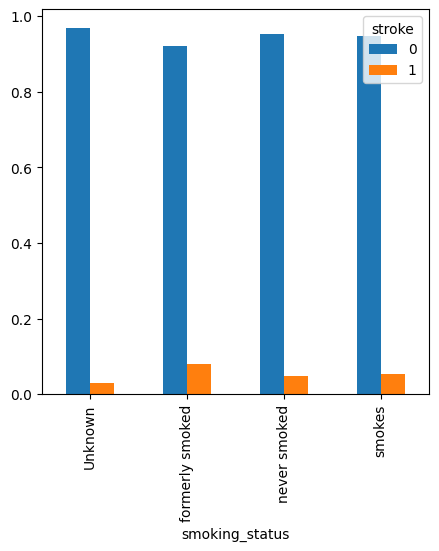

In [54]:
pd.crosstab(data['smoking_status'],data['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

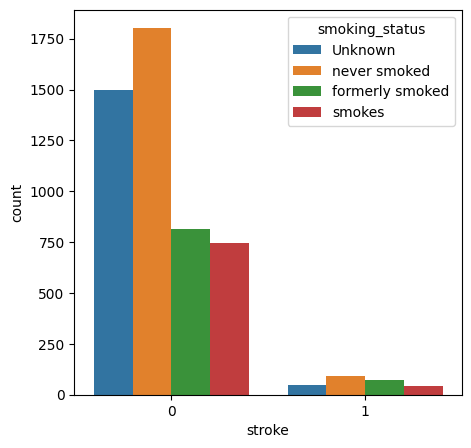

In [55]:
sns.countplot(x='stroke', hue='smoking_status', data=data)

<Axes: xlabel='Residence_type'>

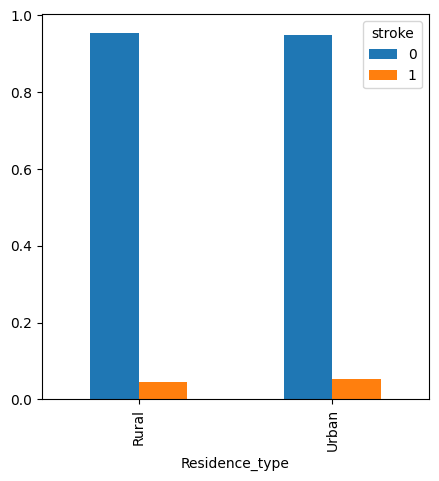

In [56]:
pd.crosstab(data['Residence_type'],data['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

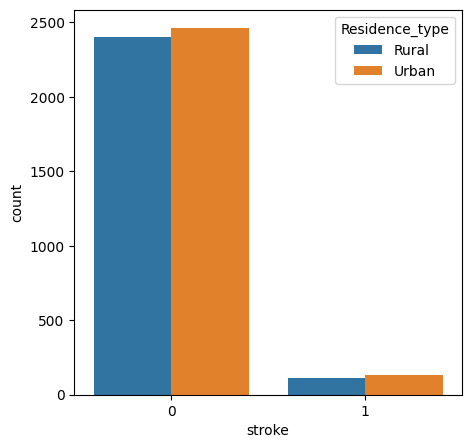

In [57]:
sns.countplot(x='stroke', hue='Residence_type', data=data)

<Axes: xlabel='stroke', ylabel='count'>

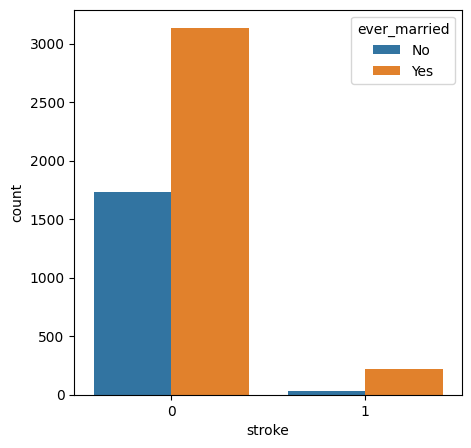

In [58]:
sns.countplot(x='stroke', hue='ever_married', data=data)

<Axes: >

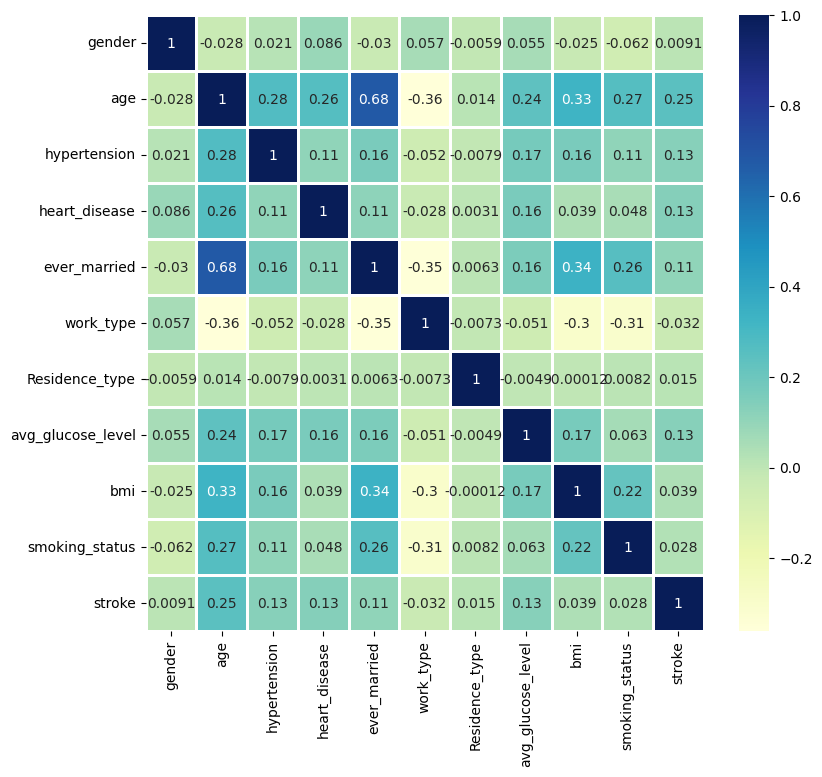

In [129]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [60]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [61]:
# convert all string to some int specific
gender=enc.fit_transform(data['gender'])

In [62]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [63]:
work_type=enc.fit_transform(data['work_type'])

In [64]:
Residence_type=enc.fit_transform(data['Residence_type'])

In [65]:
ever_married=enc.fit_transform(data['ever_married'])

In [66]:
# replace old with new
data['work_type']=work_type

In [67]:
data['ever_married']=ever_married

In [68]:
data['gender']=gender

In [69]:
data['Residence_type']=Residence_type

In [70]:
data['smoking_status']=smoking_status

In [71]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting the data for Train and Test

In [73]:
X=data.drop('stroke',axis=1)

In [74]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [75]:
Y=data['stroke']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train=train_test_split(X,Y,test_size=0.2,random_state=None)

In [77]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1300,0,71.0,0,0,1,2,1,214.77,28.893237,0
2185,1,64.0,0,1,1,2,1,211.35,30.700000,1
653,0,79.0,0,0,1,2,1,70.35,23.000000,1
1113,0,66.0,0,0,1,3,0,251.46,35.200000,3
749,1,55.0,0,0,1,0,0,65.12,30.000000,2
...,...,...,...,...,...,...,...,...,...,...
3988,1,57.0,0,0,1,3,0,84.79,32.800000,1
1348,0,65.0,0,0,0,3,0,86.33,33.100000,2
1162,1,74.0,0,0,1,2,0,83.50,26.700000,0
2661,1,61.0,0,0,1,2,1,227.98,14.200000,0


In [78]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2599,0,76.0,0,0,1,2,1,196.61,23.000000,2
870,1,49.0,0,0,1,2,0,102.47,29.300000,1
4273,0,31.0,0,0,0,0,0,70.66,27.200000,2
2578,0,59.0,0,0,1,3,0,201.45,43.800000,3
3967,0,61.0,0,0,1,2,0,60.91,29.800000,0
...,...,...,...,...,...,...,...,...,...,...
3515,0,55.0,0,0,1,2,1,102.10,22.500000,1
3027,1,77.0,0,0,1,0,1,64.40,27.800000,2
273,0,59.0,0,0,1,2,1,109.82,23.700000,2
3851,1,2.0,0,0,0,4,1,89.85,23.300000,0


In [79]:
Y_train

1300    0
2185    0
653     0
1113    0
749     0
       ..
3988    0
1348    0
1162    0
2661    0
1626    0
Name: stroke, Length: 4088, dtype: int64

In [80]:
Y_test

2599    0
870     0
4273    0
2578    0
3967    0
       ..
3515    0
3027    0
273     0
3851    0
4286    0
Name: stroke, Length: 1022, dtype: int64

# Normalization

In [81]:
# scaling to closest value for easy travelling of model

In [82]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [83]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [84]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [85]:
import pickle
import os


In [88]:
scaler_path=os.path.join('C:/Users/AMAR PAAPU/Desktop/Project/Stroke Prediction/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [89]:
X_train_std

array([[-0.83189722,  1.22709004, -0.33387666, ...,  2.36356517,
         0.01410054, -1.29014592],
       [ 1.20207158,  0.91828151, -0.33387666, ...,  2.28889415,
         0.24937929, -0.35733437],
       [-0.83189722,  1.58001408, -0.33387666, ..., -0.78964782,
        -0.75332346, -0.35733437],
       ...,
       [ 1.20207158,  1.35943656, -0.33387666, ..., -0.50253557,
        -0.27150526, -1.29014592],
       [ 1.20207158,  0.78593499, -0.33387666, ...,  2.65198744,
        -1.89926946, -1.29014592],
       [-0.83189722, -0.44929915, -0.33387666, ...,  2.9764352 ,
        -1.70393776,  1.50828874]])

In [90]:
X_test_std

array([[-0.83189722,  1.44766757, -0.33387666, ...,  1.96706643,
        -0.75332346,  0.57547719],
       [ 1.20207158,  0.25654893, -0.33387666, ..., -0.08835159,
         0.06706969, -0.35733437],
       [-0.83189722, -0.53753016, -0.33387666, ..., -0.7828794 ,
        -0.20639469,  0.57547719],
       ...,
       [-0.83189722,  0.69770398, -0.33387666, ...,  0.07212559,
        -0.66216867,  0.57547719],
       [ 1.20207158, -1.81687981, -0.33387666, ..., -0.36389202,
        -0.71425712, -1.29014592],
       [ 1.20207158, -1.77276431, -0.33387666, ...,  1.92645588,
         0.01410054, -1.29014592]])

# Training

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [92]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [93]:
dt.feature_importances_

array([0.03405069, 0.19088035, 0.02714633, 0.01252879, 0.02119781,
       0.0517788 , 0.01718864, 0.36084282, 0.21687299, 0.06751278])

In [94]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [95]:
#prediction of getting stroke 0=no stroke 1=stroke

In [96]:
Y_pred=dt.predict(X_test_std)

In [97]:
Y_test

2599    0
870     0
4273    0
2578    0
3967    0
       ..
3515    0
3027    0
273     0
3851    0
4286    0
Name: stroke, Length: 1022, dtype: int64

In [98]:
X_test


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2599,0,76.0,0,0,1,2,1,196.61,23.000000,2
870,1,49.0,0,0,1,2,0,102.47,29.300000,1
4273,0,31.0,0,0,0,0,0,70.66,27.200000,2
2578,0,59.0,0,0,1,3,0,201.45,43.800000,3
3967,0,61.0,0,0,1,2,0,60.91,29.800000,0
...,...,...,...,...,...,...,...,...,...,...
3515,0,55.0,0,0,1,2,1,102.10,22.500000,1
3027,1,77.0,0,0,1,0,1,64.40,27.800000,2
273,0,59.0,0,0,1,2,1,109.82,23.700000,2
3851,1,2.0,0,0,0,4,1,89.85,23.300000,0


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [101]:
ac_dt

0.9178082191780822

In [102]:
# this is the accuracy of decision tree

In [103]:
import joblib
model_path=os.path.join('C:/Users/AMAR PAAPU/Desktop/Project/Stroke Prediction/','models/dt.sav') 

joblib.dump(dt,model_path)

['C:/Users/AMAR PAAPU/Desktop/Project/Stroke Prediction/models/dt.sav']

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [105]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [106]:
Y_pred_lr=lr.predict(X_test_std)

In [107]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [108]:
ac_lr

0.9178082191780822

In [109]:
# this is the accuracy of logistic regression

# KNN 

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [111]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [112]:
y_pred=knn.predict(X_test_std)

In [113]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [114]:
ac_knn

0.9178082191780822

In [115]:
ac_lr


0.9178082191780822

In [113]:
# this is the accuracy of KNN

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [117]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [118]:
Y_pred=rf.predict(X_test_std)

In [119]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [120]:
ac_rf

0.952054794520548

In [119]:
# this is the accuracy of Random Forest

# SVM

In [121]:
from sklearn.svm import SVC


In [122]:
sv=SVC()

In [123]:
sv.fit(X_train_std,Y_train)

SVC()

In [124]:
Y_pred=sv.predict(X_test_std)

In [125]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [126]:
ac_sv

0.952054794520548

In [127]:
import joblib
model_path=os.path.join('C:/Users/AMAR PAAPU/Desktop/Project/Stroke Prediction/','models/sv.sav')

joblib.dump(sv,model_path)

['C:/Users/AMAR PAAPU/Desktop/Project/Stroke Prediction/models/sv.sav']

# Plotting

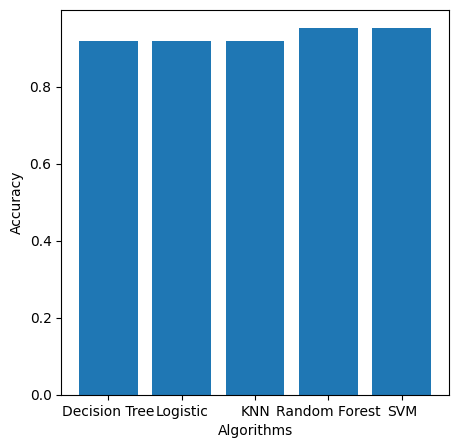

In [128]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()